# Crop Fertilizers Analysis and Prediction

Here will be using the dataset Fertilizer Prediction.csv and use it to use it to analyse the different crop fettilizers and predict the type of fertilizers using the data.

In Data analysis we will use 7 algorithms 

1.Logistic Regression

2.Linear Regression

3.Ridge Regression

4.K Neighbors Classifier

5.Lasso Regression

6.Random Forest Classifier

7.Decision Tree Classifier

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

## **Data Exploration**

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis

In [2]:
##reading dataset
df = pd.read_csv('./DataSets/Fertilizer Prediction.csv')

print(df.shape)
df1 = df.copy()
df

(99, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [3]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

## **Data Preparation**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
# describing the dataset
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:

for n, i in enumerate(df1['Fertilizer Name']):
    if i=='Urea':
        df1['Fertilizer Name'][n] = 1.0
    if i=='DAP':
        df1['Fertilizer Name'][n] = 2.0
    if i=='14-35-14':
        df1['Fertilizer Name'][n] = 3.0
    if i=='28-28':
        df1['Fertilizer Name'][n] = 4.0
    if i=='17-17-17':
        df1['Fertilizer Name'][n] = 5.0
    if i=='20-20':
        df1['Fertilizer Name'][n] = 6.0
    if i=='10-26-26':
        df1['Fertilizer Name'][n] = 7.0
df1['Fertilizer Name']

0     1.0
1     2.0
2     3.0
3     4.0
4     1.0
     ... 
94    4.0
95    7.0
96    1.0
97    2.0
98    6.0
Name: Fertilizer Name, Length: 99, dtype: object

In [7]:
# now we check how many unique type of soil type is there
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [8]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

## **Data Visualization**

<AxesSubplot:>

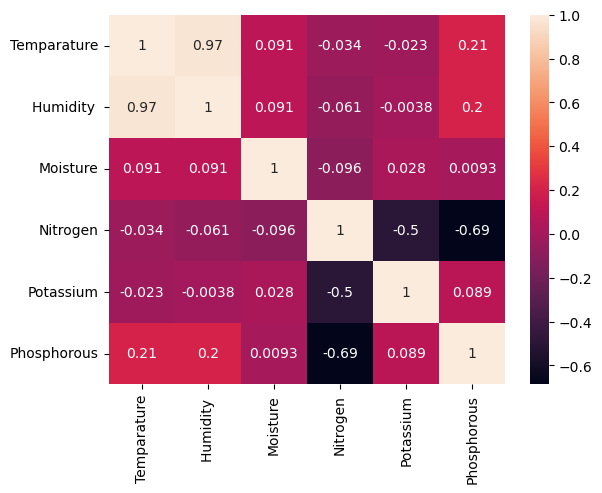

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

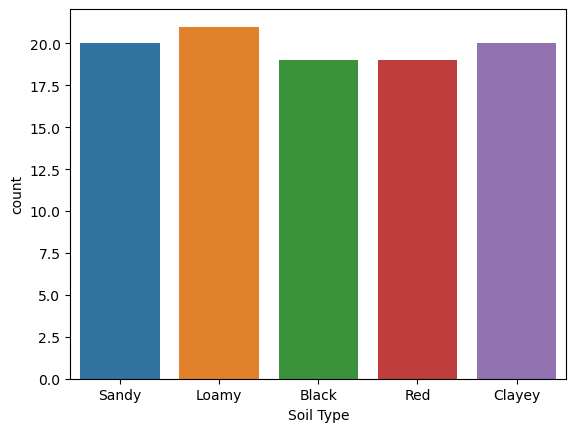

In [10]:
# visualizring the count plot for different soil type
sns.countplot(x='Soil Type', data = df)

In [11]:
# now we check how many unique type of crop type is there
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

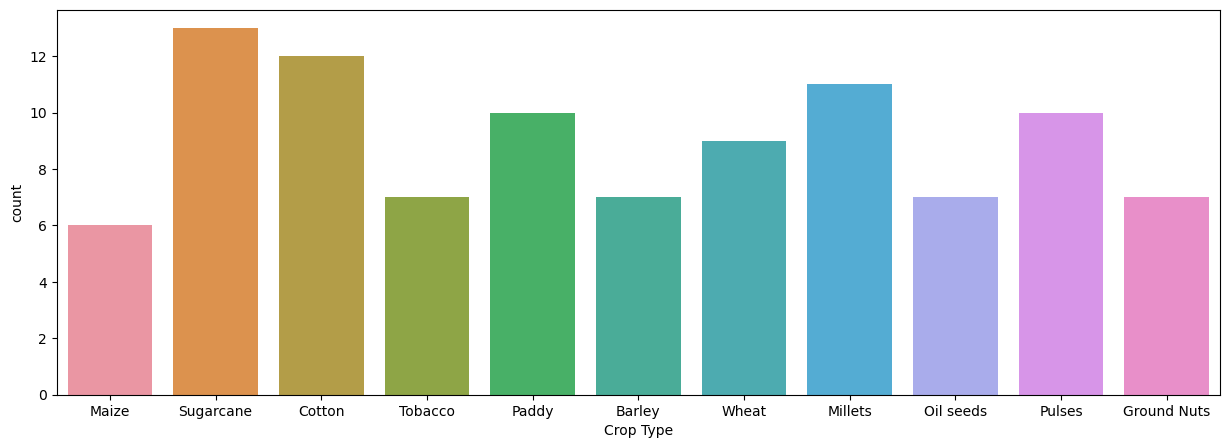

In [12]:
# visualizring the count plot for different crop type
plt.figure(figsize=(15,5))
sns.countplot(x='Crop Type', data = df)

In [13]:
# now we check how many unique type of Fertilizer type is there
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

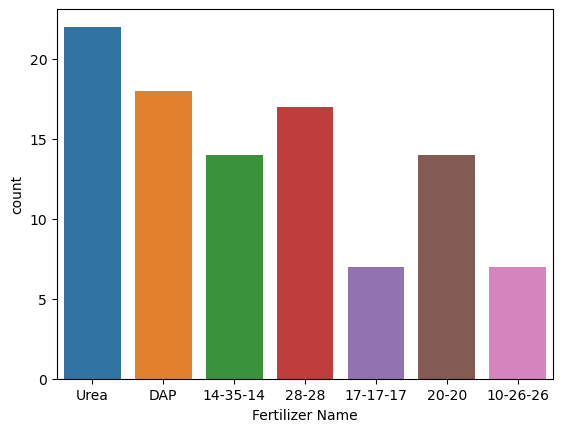

In [14]:
# visualizring the count plot for different fertilizer type
sns.countplot(x='Fertilizer Name', data = df)

<AxesSubplot:xlabel='Temparature', ylabel='count'>

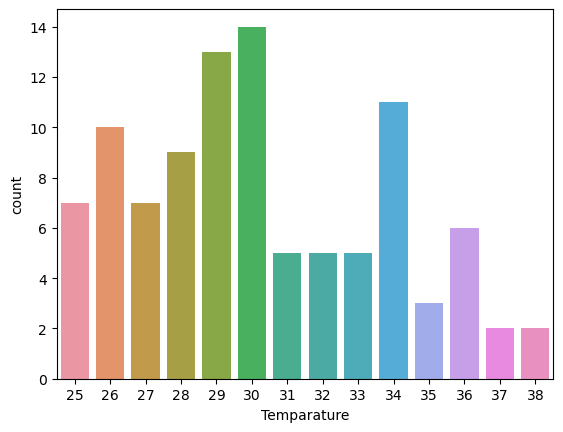

In [15]:
# visualizring the count plot for different Temparature
sns.countplot(x='Temparature', data = df)

<AxesSubplot:xlabel='Moisture', ylabel='count'>

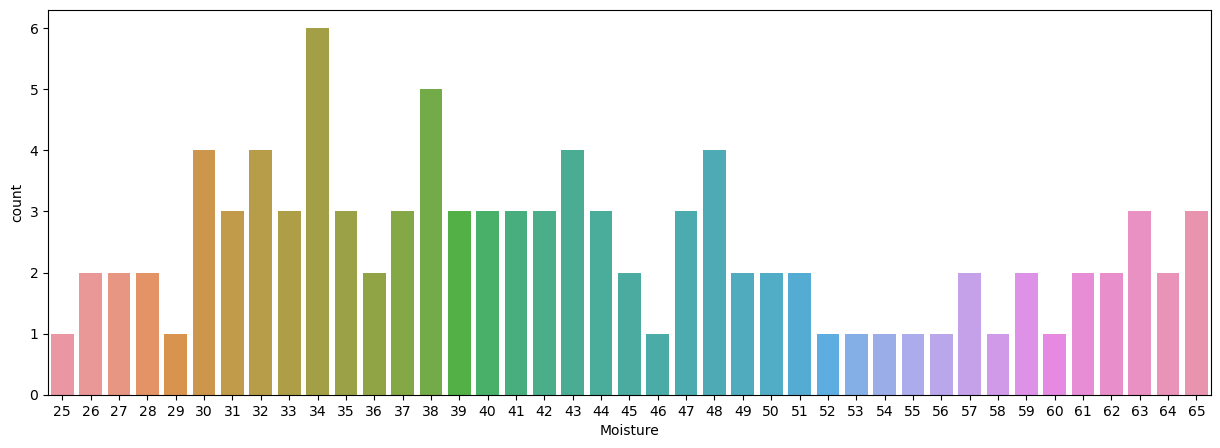

In [16]:
# visualizring the count plot for different Moisture 
plt.figure(figsize=(15,5))
sns.countplot(x='Moisture', data = df)

<AxesSubplot:xlabel='Nitrogen', ylabel='count'>

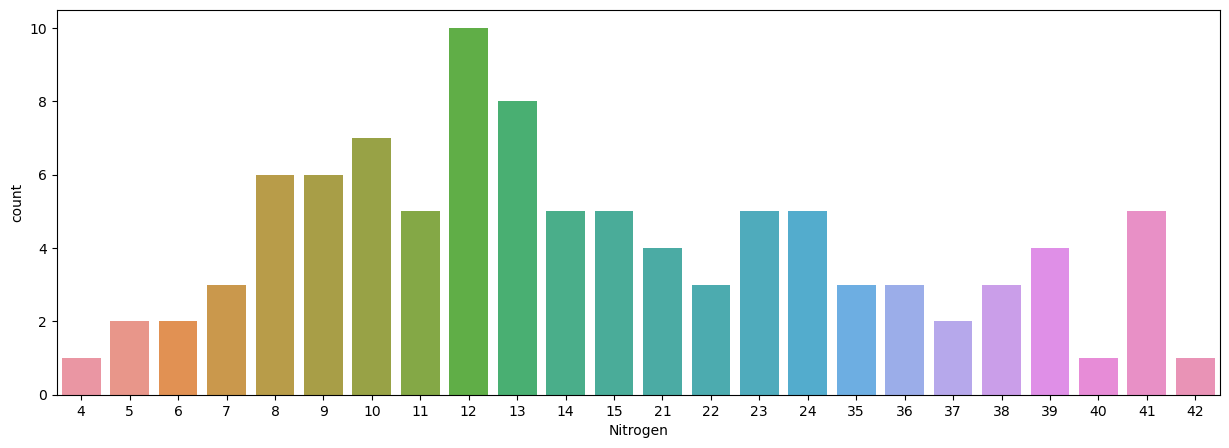

In [17]:
# visualizring the count plot for different Nitrogen 
plt.figure(figsize=(15,5))
sns.countplot(x='Nitrogen', data = df)

<AxesSubplot:xlabel='Potassium', ylabel='count'>

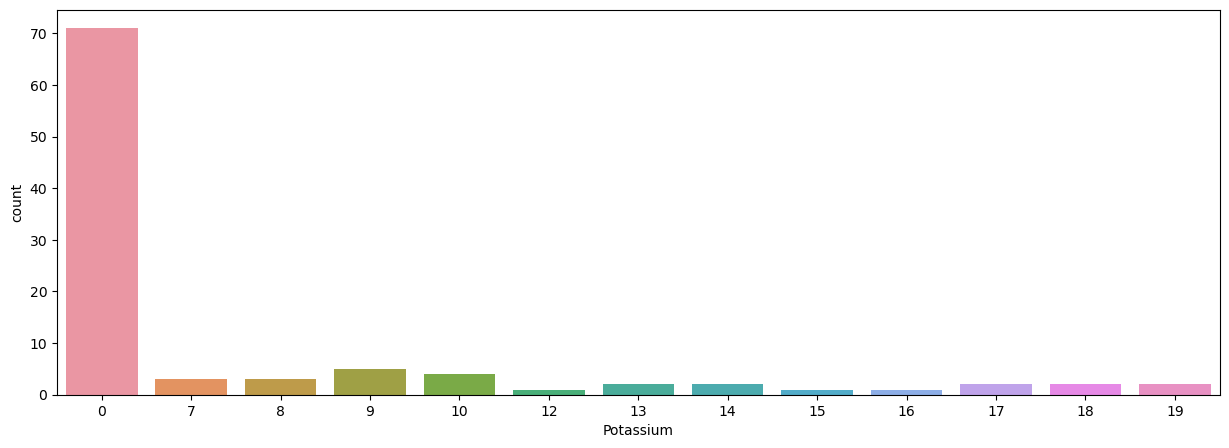

In [18]:
# visualizring the count plot for different Potassium 
plt.figure(figsize=(15,5))
sns.countplot(x='Potassium', data = df)

<AxesSubplot:xlabel='Phosphorous', ylabel='count'>

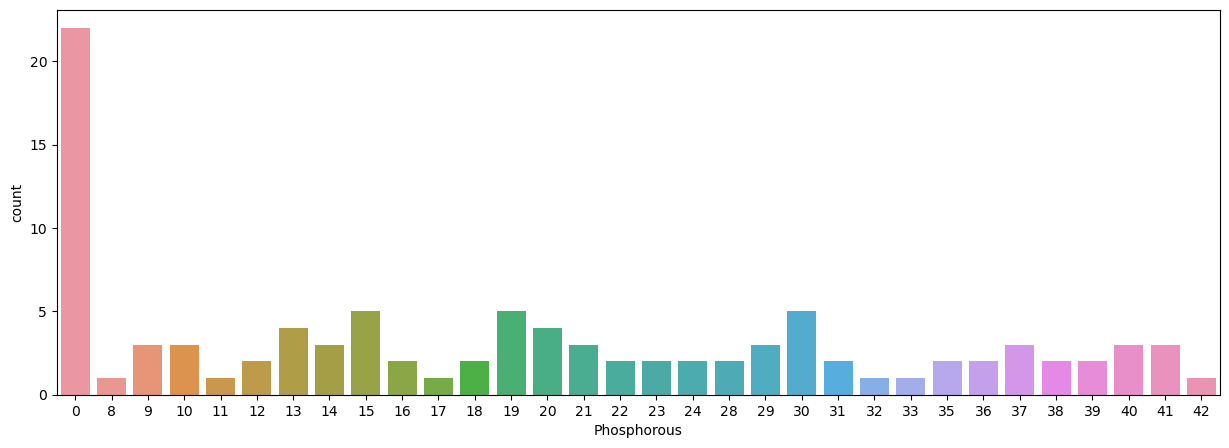

In [19]:
# visualizring the count plot for different Phosphorous 
plt.figure(figsize=(15,5))
sns.countplot(x='Phosphorous', data = df)

## **Data Training**

In [20]:
y=df['Fertilizer Name'].copy()
X=df.drop(['Fertilizer Name'],axis=1).copy()
y1=df1['Fertilizer Name'].copy()
X1=df1.drop(['Fertilizer Name'],axis=1).copy()

In [21]:
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [22]:
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19
95,30,60,27,Red,Tobacco,4,17,17
96,38,72,51,Loamy,Wheat,39,0,0
97,36,60,43,Sandy,Millets,15,0,41


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')

In [24]:
X = np.array(ct.fit_transform(X))
X1 = np.array(ct.fit_transform(X1))

In [25]:
X


array([[ 0.,  0.,  0., ..., 37.,  0.,  0.],
       [ 0.,  0.,  1., ..., 12.,  0., 36.],
       [ 1.,  0.,  0., ...,  7.,  9., 30.],
       ...,
       [ 0.,  0.,  1., ..., 39.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  0., 41.],
       [ 1.,  0.,  0., ..., 12.,  0., 10.]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.2)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=40,test_size=0.2)

In [27]:
X_train

array([[ 0.,  0.,  0., ..., 11., 12., 15.],
       [ 0.,  0.,  0., ..., 41.,  0.,  0.],
       [ 0.,  1.,  0., ...,  6., 19., 16.],
       ...,
       [ 0.,  0.,  1., ..., 41.,  0.,  0.],
       [ 0.,  1.,  0., ...,  6., 19., 21.],
       [ 0.,  1.,  0., ..., 21.,  0., 23.]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

# **Model Creation**

### **Logistic Regression**

In [30]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression() # created a 

In [31]:
model1.fit(X_train, y_train)
# Making predictions 
pred1 = model1.predict(X_test)
pred1

array(['20-20', '14-35-14', 'DAP', '17-17-17', '14-35-14', '14-35-14',
       '28-28', 'Urea', '17-17-17', '20-20', 'Urea', 'Urea', 'Urea',
       'Urea', 'DAP', '28-28', '10-26-26', '10-26-26', '14-35-14', 'DAP'],
      dtype=object)

In [32]:
print("Accuracy of the LogisticRegression model comes to be: \n ") 
print(model1.score(X_train,y_train))

Accuracy of the LogisticRegression model comes to be: 
 
1.0


### **Linear Regression**

In [33]:
# Linear Regression

from sklearn.linear_model import LinearRegression
model2=LinearRegression() # created a

In [34]:
model2.fit(X1_train, y1_train)
# Making predictions 
pred2 = model2.predict(X1_test)
pred2

array([ 4.01998512,  4.89662157,  4.33268014,  5.12894242,  3.96994834,
        4.87312739,  2.58560982,  1.76254897,  5.16548946,  5.86649956,
        0.82309112,  2.92854109,  1.00431967, -0.3021214 ,  2.65044903,
        3.25908206,  6.29286553,  3.81602318,  4.03054995,  2.12473899])

In [35]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(model2.score(X1_train,y1_train))

Accuracy of the LinearRegression model comes to be: 
 
0.8014938874526445


### **Ridge Regression**

In [36]:
# Importing model
from sklearn.linear_model import Ridge
model3 = Ridge()

In [37]:
#Fitting data into the model.
model3.fit(X1_train, y1_train)
# Making predictions on Test data 
pred3 = model3.predict(X1_test)
pred3

array([4.06699264, 4.69167572, 4.25389331, 5.24880042, 3.92667704,
       4.89008377, 2.4726087 , 1.67177764, 5.33417389, 5.87737405,
       1.07482081, 2.79074373, 1.12716344, 0.33347176, 2.60248876,
       3.31051946, 6.18690294, 3.9648718 , 3.92651579, 1.63068483])

In [38]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(model3.score(X1_train,y1_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.7973366911868288


### **K Neighbors Classifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=30)

In [40]:
#Fitting data into the model.
model4.fit(X_train, y_train)
# Making predictions on Test data 
pred4 = model4.predict(X_test)
pred4

array(['20-20', '20-20', 'DAP', '20-20', '20-20', '14-35-14', '28-28',
       'Urea', '28-28', '20-20', 'Urea', 'Urea', '20-20', 'Urea', '20-20',
       '28-28', '14-35-14', '14-35-14', '20-20', 'DAP'], dtype=object)

In [41]:
print("Accuracy of the K Neighbors Classifier model comes to be: \n ") 
print(model4.score(X_train,y_train))

Accuracy of the K Neighbors Classifier model comes to be: 
 
0.5949367088607594


### **Lasso Regression**

In [42]:
# Importing model
from sklearn.linear_model import Lasso
model5 = Lasso()

In [43]:
#Fitting data into the model.
model5.fit(X1_train, y1_train)
# Making predictions on Test data 
pred5 = model5.predict(X1_test)
pred5

array([4.96383034, 4.02933322, 4.43529527, 5.37028081, 3.92066652,
       4.86032252, 2.47990472, 2.02875663, 4.9425128 , 5.30558542,
       1.37157356, 2.2972182 , 2.24513718, 1.89076773, 2.63337026,
       3.05215675, 5.44028439, 4.50122186, 4.18766281, 2.04264648])

In [44]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(model5.score(X1_train,y1_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.7139350043103876


### **Random Forest Classifier**

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()

In [46]:
model6.fit(X_train,y_train)
pred6=model6.predict(X_test)
pred6

array(['20-20', '14-35-14', '14-35-14', '17-17-17', '14-35-14',
       '10-26-26', 'DAP', 'Urea', '17-17-17', '20-20', 'Urea', 'Urea',
       '28-28', 'Urea', '28-28', '28-28', '10-26-26', '14-35-14',
       '14-35-14', 'DAP'], dtype=object)

In [47]:
print("Accuracy of the RandomForest model comes to be: \n ") 
print(accuracy_score(y_test,pred6))

Accuracy of the RandomForest model comes to be: 
 
0.95


### **Decision Tree Regression**

In [48]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
model7 = DecisionTreeRegressor()

In [49]:
#Fitting data into the model.
model7.fit(X1_train, y1_train)
# Making predictions on Test data 
pred7 = model7.predict(X1_test)
pred7

array([6., 3., 3., 5., 3., 5., 2., 1., 5., 6., 1., 1., 4., 1., 4., 4., 7.,
       3., 3., 2.])

In [50]:
print("Accuracy of the DecisionTree Classifier model comes to be: \n ") 
print(model7.score(X1_train,y1_train))

Accuracy of the DecisionTree Classifier model comes to be: 
 
1.0


# **Performance Evaluation**

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\tAccuracy of the model") 
print("""Logistic Regression\t\t {:.4f}""".format( model1.score(X_train,y_train)))
print("""Linear Regression\t\t {:.4f}""".format(model2.score(X1_train,y1_train)))
print("""Ridge Regression\t\t {:.4f}""".format( model3.score(X1_train,y1_train)))
print("""K Neighbors Classifier\t \t\t {:.4f}""".format( model4.score(X_train,y_train)))
print("""Lasso Regression\t\t {:.4f}""".format(  model5.score(X1_train,y1_train)))
print("""Random Forest Classifier\t\t {:.4f}""".format( accuracy_score(y_test,pred6)))
print("""Decision Tree Classifier\t\t {:.4f}""".format( model7.score(X1_train,y1_train)))

Model			Accuracy of the model
Logistic Regression		 1.0000
Linear Regression		 0.8015
Ridge Regression		 0.7973
K Neighbors Classifier	 		 0.5949
Lasso Regression		 0.7139
Random Forest Classifier		 0.9500
Decision Tree Classifier		 1.0000


Conclusion: The  efficient models: Logistic regression & Decision tree based on accuracy alone.